#              Data Engineering

###                                       DAT-204

###                                Fall, 2022/2023

##     Balancing Data and Feature Selection

###              Complete Project Due: Dec 10, 2022

###                                   Prepared By:

###                       Asmaa Luai-202111148

###                 Hala Anas Kahwajy 202111191

###                         Judi Shibly-202111461

###                      Lujain Adnan-202110929

###                                
                            Dr. Ghazi Al-Naymat
                Department of Information Technology
   College of Engineering and Information Technology
                                Ajman University

## Table of Contents for Part I

- Introduction

- Importing the needed libraries

- Processing the dataset

- Cleaning the dataset

- Exploring and Analyzing the dataset

- Testing different balancing methods

- Machine Learning models

- Comparing the models

- Conclusion

- References

### 1. Introduction

This project is divided into two parts...............................................cjfjhdufhcsgydgvcygsudggcgdcgdgvgdgvvghvbh vhv hv hvbdsuh

### 2. Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
!pip install category-encoders
import category_encoders as ce

In [2]:
#Reading the data set
dataSet = pd.read_csv('Balancing Dataset.csv',low_memory=False )

#Viewing the data set
dataSet

id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43476  52380    Male  47.0             0              0           No   
43477  56196  Female  10.0             0              0           No   
43478   5450  Female  56.0             0              0          Yes   
43479  28375  Female  82.0             1              0          Yes   
43480  27973    Male  40.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          children          Rural              95.12  18.0              NaN   
1           Private          Urban              87.96  39.2     never smoked   
2           Private          Urban             110.89  17.6              NaN   
3           Private          Rural              69.04  35.9  formerly smoked   
4      Never_worked          Rural             161.28  19.1              NaN   
...             ...            ...                ...   ...              ...   
43476      Govt_job          Urban              68.52  25.2  formerly smoked   
43477      children          Urban              58.64  20.4     never smoked   
43478      Govt_job          Urban             213.61  55.4  formerly smoked   
43479       Private          Urban              91.94  28.9  formerly smoked   
43480       Private          Urban              99.16  33.2     never smoked   

       stroke  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
43476       0  
43477       0  
43478       0  
43479       0  
43480       0  

[43481 rows x 12 columns]

In [3]:
print('Rows, Columns:',dataSet.shape)

Rows, Columns: (43481, 12)


In [4]:
data = dataSet

### Observing the unique values 

This step is very important because we want to observe all the unique values in the data set, so we can appropriately deal with them later.

In [5]:
#Getting the number of unique values
print(dataSet.nunique())

id                   43400
gender                   3
age                    104
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    12543
bmi                    555
smoking_status           3
stroke                   2
dtype: int64


### Observing qualitative columns

In [6]:
print(f"gender: {dataSet['gender'].unique()}\n")
print(f"ever_married: {dataSet['ever_married'].unique()}\n")
print(f"work_type: {dataSet['work_type'].unique()}\n")
print(f"Residence_type: {dataSet['Residence_type'].unique()}\n")
print(f"smoking_status: {dataSet['smoking_status'].unique()}\n")


gender: ['Male' 'Female' 'Other']

ever_married: ['No' 'Yes']

work_type: ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']

Residence_type: ['Rural' 'Urban']

smoking_status: [nan 'never smoked' 'formerly smoked' 'smokes']



 For "smoking_status" column we can see that we have NaN data.

### Cleaning the data set

We're ready to go on to the next step now that we've processed the data! Cleaning up the information.
1- To begin, we will drop irrelevant columns
2- Remove duplicates
3- Deal with missing data values
4- Handle outliers
5- Perfecting the data

### Dropping Irrelevant Columns 

(In part II) we will discover different methods of selecting features, but for now because we have few columns, we can identify what columns are irrelevant to make predictions.

In [7]:
#Dropping the column "case_id"
dataSet = dataSet.drop(['id'], axis=1)

In [8]:
#dataset before and after
print('Before: Rows, Columns:',data.shape)
print('After: Rows, Columns:',dataSet.shape)

Before: Rows, Columns: (43481, 12)
After: Rows, Columns: (43481, 11)


### Removing Duplicates

Duplicates may bias our model later, hence we decided to remove them.

In [9]:
#Check if we have any duplicates
print('Number of duplicates: ',dataSet.duplicated().sum())

Number of duplicates:  81


We have 81 duplicated row, so we will drop them.

In [10]:
#dropping the duplicates
dataSet = dataSet.drop_duplicates()

In [11]:
#dataset before and after
print('Before: Rows, Columns:',data.shape)
print('After: Rows, Columns:',dataSet.shape)

Before: Rows, Columns: (43481, 12)
After: Rows, Columns: (43400, 11)


As we can see the dataset now is 81 rows smaller.

### Checking if we have any missing values

Many machine learning models do not accept missing values, and we want to get accurate results hence, this step is very crucial.

In [12]:
#Printing the sum of the missing values in each column
print(dataSet.isnull().sum())

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


We have 1462 missing values from the "bmi" column, and 13292 from the "smoking_status" column. Hence, we should figure out ways to deal with them. The "bmi" columns contains data of floating numbers, and the "smoking_status" contains nominal data. There are different ways of dealing with missing data, however we chose to use the Backward Fill method for "bmi" and "smoking_status" columns. And for the "bmi" column we decided to check for outliers first and get rid of them, then we will fill in the missing values.

In [13]:
#Backward fill method 
dataSet['smoking_status'] = dataSet['smoking_status'].fillna(method = 'bfill')

In backward fill, the missing value is imputed using the next value.

### Handeling outliers

The easiest way to check for outliers is to visualize them using a boxplot.

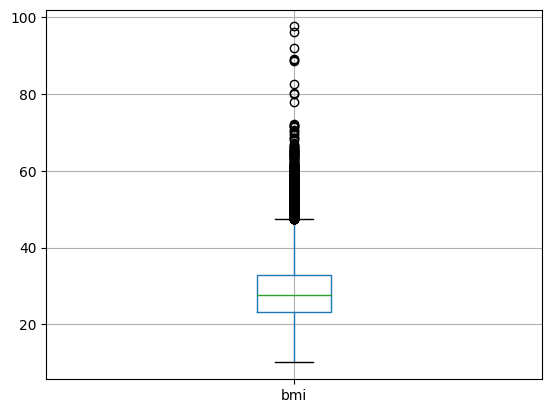

In [14]:
boxPlot = dataSet.boxplot(column = 'bmi')

We obviously have outliers, but just to check we will view the statistics

In [15]:
dataSet['bmi'].describe()

count    41938.000000
mean        28.605038
std          7.770020
min         10.100000
25%         23.200000
50%         27.700000
75%         32.900000
max         97.600000
Name: bmi, dtype: float64

We can can see from the table that the minimum value currently is 10.1 and the maximum value is 97.60. Let's check how removing the outliers will change the results.

We need to get the values of the first and last quartiles and then find the interquartile range to get the lower boundary, and upper boundary. This step is important because anything above the upper boundary is an outlier, and anything below the lower boundary is also an outlier. We can get the First and Last quartiles from the table, but because we want to use them to calculate the IQR we will get them again and assign them to Q1 and Q3 for the sake of organization and accurate numbers only.

In [16]:
#Getting the value of the first quartile
Q1 = dataSet['bmi'].quantile(0.25)

#Getting the value of the third quartile
Q3 = dataSet['bmi'].quantile(0.75)

#Getting the interquartile range
IQR = Q3 - Q1

#Defining the upper and lower boundaries
lowerLimit = Q1 - 1.5 * IQR
upperLimit = Q3 + 1.5 * IQR
print('Lower limit: ',lowerLimit, '\nupperLimit: ', upperLimit)

Lower limit:  8.65 
upperLimit:  47.449999999999996


In [17]:
#Getting the number of outliers in the column BMI (anything above the upper boundaryo or  below the lower boundary)
((dataSet['bmi'] < lowerLimit) | (dataSet['bmi'] > upperLimit)).sum()

888

We decided to replace the outliers with the median rather than getting rid of them because we do not want to lose valuable data. And we purposly avoided replacing them with the mean, because the mean is highly susceptible to outliers since we add all the numbers including the outliers then divide them over the number of values. It does not make sense to use it here, since the outliers will definitely affect the mean.

In [18]:
#Gettin the median of the BMI column
median = dataSet['bmi'].median(axis = 0)

In [19]:
#Replacing the outliers with the median using .mask method
dataSet['bmi'] = dataSet['bmi'].mask(dataSet['bmi'] < lowerLimit, median)
dataSet['bmi'] = dataSet['bmi'].mask(dataSet['bmi'] > upperLimit, median)

In [20]:
#Checking the number of outliers again to make sure we got rid of all of them.
((dataSet['bmi'] < lowerLimit) | (dataSet['bmi'] > upperLimit)).sum()

0

In [21]:
#Now we are checking the statistics to compare between before removing the outliers and after.
dataSet['bmi'].describe()

count    41938.000000
mean        28.065025
std          6.820459
min         10.100000
25%         23.200000
50%         27.700000
75%         32.300000
max         47.400000
Name: bmi, dtype: float64

As we can see now the minimum value in the BMI column is 10.1 and the maximum value is 47.4. Which makes sense now because the lower boundary as we have seen before is 8.65, and the upper boundary is 47.49. Which means they are inside the range.

Now, after removing the outliers, we can return back to our main problem. Filling the missing values in the "bmi" column using backward fill.

In [22]:
dataSet['bmi'] = dataSet['bmi'].fillna(method = 'bfill')

In [23]:
#Printing the sum of the missing values in each column to check 
	
dataSet.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Encoding categorical data

As what can be seen, our data set contains mostly categorical values. For the sake of machine learning algorithms we decided that it is best to convert our categorical data to numerical. Hence, we will use suitable methods that will help us to do that.

### Label Encoding

In [24]:
# label_encoder object to use it for encoding
label_encoder = preprocessing.LabelEncoder()

In [25]:
# Encode labels in column 'hsc_s'.
dataSet['gender']= label_encoder.fit_transform(dataSet['gender'])

dataSet['gender'].unique()

array([1, 0, 2])

In [26]:
# Encode labels in column 'degree_t'.
dataSet['smoking_status']= label_encoder.fit_transform(dataSet['smoking_status'])

dataSet['smoking_status'].unique()

array([1, 0, 2])

### Hashing Encoding

In [27]:
#Create object for hash encoder
ce_HE = ce.HashingEncoder(cols=['work_type'],n_components=5)
#Fit and transform and you will get the encoded data
dataSet= ce_HE.fit_transform(dataSet)


### Binary Encoding

In [28]:
#Create object of BinaryEncoder
ce_binary= ce.BinaryEncoder(cols=['ever_married'])
#Fit and transform and you will get the encoder data
dataSet= ce_binary.fit_transform(dataSet)

ce_binary= ce.BinaryEncoder(cols=['Residence_type'])
dataSet= ce_binary.fit_transform(dataSet)

### Visualizing the target class

In [29]:
#let's show this with pie chart first approach
dataSet['stroke'].value_counts().plot.pie(autopct='%.2f')


<AxesSubplot: ylabel='stroke'>

In [30]:
dataSet['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [31]:
!pip install --upgrade pip

In [32]:
!pip install numpy==1.22

  Using cached numpy-1.22.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.22.0 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.0 which is incompatible.


In [33]:
!pip install --pre pycaret[full]

  Using cached numpy-1.20.3-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.4 MB)
  Using cached numpy-1.19.5-cp39-cp39-manylinux2010_x86_64.whl (14.9 MB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Not uninstalling jinja2 at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'Jinja2'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.


In [34]:
from pycaret.utils import version
version()

'2.3.10'

In [35]:
#pip install pycaret

In [36]:
data = dataSet.sample(frac=0.95, random_state=786)
data_unseen = dataSet.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (41230, 17)
Unseen Data For Predictions: (2170, 17)


In [37]:
from pycaret.classification import *

In [38]:
from pycaret.datasets import get_data
data = get_data('Balancing Dataset.csv')

InvalidURL: URL can't contain control characters. '/pycaret/pycaret/master/datasets/Balancing Dataset.csv.csv' (found at least ' ')

In [ ]:
exp_clf101 = setup(data = data, target = 'stroke', session_id=123) 

IntProgress(value=0, description='Processing: ', max=3)

Initiated  . . . . . . . . . . . . . . . . . .              06:34:12
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

Data Type
col_0              Categorical
col_1              Categorical
col_2              Categorical
col_3              Categorical
col_4              Categorical
gender             Categorical
age                    Numeric
hypertension       Categorical
heart_disease      Categorical
ever_married_0     Categorical
ever_married_1     Categorical
Residence_type_0   Categorical
Residence_type_1   Categorical
avg_glucose_level      Numeric
bmi                    Numeric
smoking_status     Categorical
stroke                   Label

### Random Undersampling

In [ ]:
df1 = dataSet

In [ ]:
#Split our data into features(X) and labels(y)
X=df1.drop('stroke',axis=1)
y=df1['stroke']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy="not minority")  
X_res, y_res = rus.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
#class distribution
y_res.value_counts()

0    783
1    783
Name: stroke, dtype: int64

In [ ]:
best_model = compare_models()

In [ ]:
print(best_model)

### Random Oversampling

In [ ]:
df2 = dataSet

In [ ]:
#Split our data into features(X) and labels(y)
X=df2.drop('stroke',axis=1)
y=df2['stroke']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority") 
X_res, y_res = ros.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
#class distribution
y_res.value_counts()

0    42617
1    42617
Name: stroke, dtype: int64

### SMOTE Oversampling

In [ ]:
df3 = dataSet

In [ ]:
#Split our data into features(X) and labels(y)
X=df3.drop('stroke',axis=1)
y=df3['stroke']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

### TomLinks Undersampling

In [ ]:
df4 = dataSet

In [ ]:
#Split our data into features(X) and labels(y)
X=df4.drop('stroke',axis=1)
y=df4['stroke']

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

### Under-sampling: Cluster Centroids

In [ ]:
df5 = dataSet

In [ ]:
#Split our data into features(X) and labels(y)
X=df5.drop('stroke',axis=1)
y=df5['stroke']

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

### Oversampling with ADASYN

In [ ]:
df6 = dataSet

In [ ]:
#Split our data into features(X) and labels(y)
X=df6.drop('stroke',axis=1)
y=df6['stroke']

In [ ]:
X_resampled, y_resampled = ADASYN().fit_sample(X, y)
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8d2282e8-3ced-4a7e-be2a-993328c168a5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>